# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
import zipfile
clean_data_path = "dataset/autos.zip"

print(zipfile.ZipFile(clean_data_path).filelist)
zf = zipfile.ZipFile(clean_data_path)
zf.open('autos.csv')
df = pd.read_csv(zf.open('autos.csv'),encoding = "utf-8")

[<ZipInfo filename='autos.csv' compress_type=deflate filemode='-rwxr-xr-x' file_size=67791600 compress_size=16804881>, <ZipInfo filename='__MACOSX/._autos.csv' compress_type=deflate filemode='-rwxr-xr-x' file_size=445 compress_size=330>]


In [42]:
p = pd.pivot_table(data=df,values='price',index=['brand','vehicleType'], aggfunc=np.mean)
p

price
brand      vehicleType              
alfa_romeo Other          669.805556
           andere         962.500000
           cabrio        7035.727778
           coupe         5265.458874
           kleinwagen    1867.865248
...                              ...
volvo      coupe         5502.100000
           kleinwagen    1475.000000
           kombi         2789.709828
           limousine     3768.010084
           suv          14081.237918

[333 rows x 1 columns]

In [32]:
p.xs(('volkswagen'))

,price
vehicleType,
Other,897.449959
andere,2597.288856
bus,5881.839891
cabrio,5784.496482
coupe,8014.078218
kleinwagen,1626.553215
kombi,3902.506211
limousine,3743.116228
suv,13946.283675


In [65]:
ptod = p.reset_index()
ptod.price = ptod.price.round(1).astype(int)

ptod[ptod.brand.str.contains('alfa')]

,brand,vehicleType,price
0,alfa_romeo,Other,669
1,alfa_romeo,andere,962
2,alfa_romeo,cabrio,7035
3,alfa_romeo,coupe,5265
4,alfa_romeo,kleinwagen,1867
5,alfa_romeo,kombi,3313
6,alfa_romeo,limousine,2600
7,alfa_romeo,suv,0


In [66]:
ptod[['price','brand','vehicleType']]

,price,brand,vehicleType
0,669,alfa_romeo,Other
1,962,alfa_romeo,andere
2,7035,alfa_romeo,cabrio
3,5265,alfa_romeo,coupe
4,1867,alfa_romeo,kleinwagen
...,...,...,...
328,5502,volvo,coupe
329,1475,volvo,kleinwagen
330,2789,volvo,kombi
331,3768,volvo,limousine


In [83]:
# Calcule a média de preço por marca e por veículo
p = ptod.pivot('brand','vehicleType','price').fillna(0).astype(int)
p

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669,962,0,7035,5265,1867,3313,2600,0
audi,1012,2685,3485,9655,11242,2582,5443,3829,18644
bmw,896,1720,4064,8613,6376,1575,5030,4838,12868
chevrolet,1250,3059,5188,10590,9991,2588,4143,4944,9613
chrysler,915,2919,2395,4160,8194,1666,3930,3191,5888
citroen,912,2249,4036,4536,2695,2274,3101,3379,10810
dacia,1674,3560,8370,0,0,3276,4166,3260,9762
daewoo,664,993,1262,900,428,1110,816,984,1900
daihatsu,614,1075,1201,7761,0,1402,3420,3329,2066


## Preço médio de um veículo por marca, bem como tipo de veículo

In [ ]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo


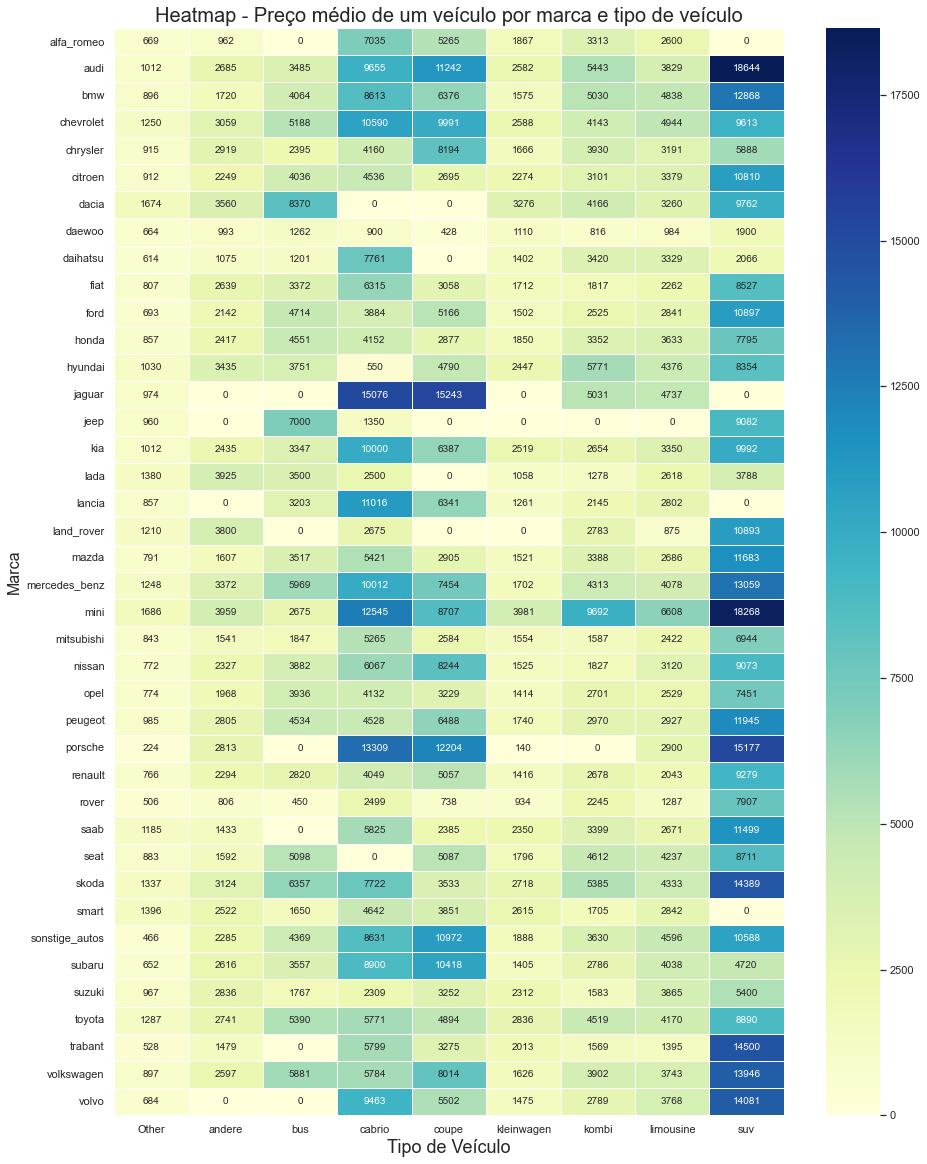

In [87]:
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(p,annot=True,cmap="YlGnBu",ax=ax,linewidths=1,fmt='d')

ax.set_ylabel('Marca',fontsize=16)
ax.set_xlabel('Tipo de Veículo',fontsize=18)

ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontsize=20)

plt.show()

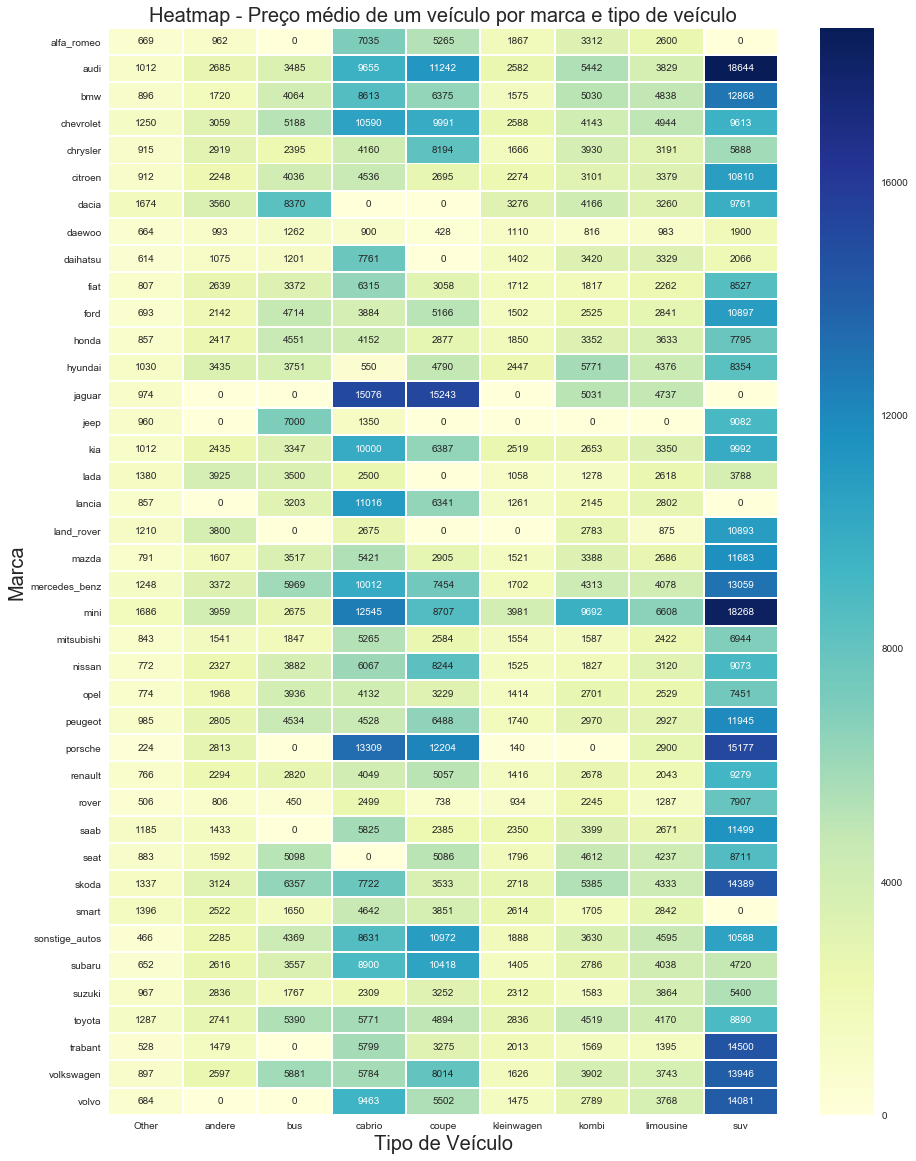

In [4]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo


In [5]:
# Salvando o plot
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>